<a href="https://colab.research.google.com/github/Sainath345/Rasaputra_IT533/blob/Sainath345-IPL/Sainath_DM_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns

In [4]:

#Reading in the data as adult dataframe
df_BallByBall = pd.read_csv("https://raw.githubusercontent.com/Sainath345/Rasaputra_IT533/main/Ball_by_Ball.csv")
df_Match = pd.read_csv("https://raw.githubusercontent.com/Sainath345/Rasaputra_IT533/main/Match.csv")

#Verifying that we can see the data
df_BallByBall.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,


In [5]:
df_Match.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


In [19]:
#sns.heatmap(df_BallByBall.reshape(-1,1).corr)
df_BallByBall.shape
corr_ball = df_Match.corr()
corr_ball

,Match_Id,Team_Name_Id,Opponent_Team_Id,Season_Id,Toss_Winner_Id,IS_Superover,IS_Result,Is_DuckWorthLewis,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id
Match_Id,1.000000,0.197904,0.143823,0.973199,0.154285,0.001446,-0.047405,0.044152,-0.027350,0.183065,0.345156,0.631265,0.244076
Team_Name_Id,0.197904,1.000000,-0.071301,0.187245,0.401367,-0.042507,0.041791,0.033693,-0.081700,0.500685,0.114603,0.115508,0.040782
Opponent_Team_Id,0.143823,-0.071301,1.000000,0.131217,0.521171,-0.029784,-0.042784,-0.025845,0.027771,0.415307,0.075354,0.066026,0.039768
Season_Id,0.973199,0.187245,0.131217,1.000000,0.132453,0.012539,-0.047647,0.015600,-0.016961,0.160728,0.361897,0.605845,0.250250
Toss_Winner_Id,0.154285,0.401367,0.521171,0.132453,1.000000,-0.080018,0.020550,0.058076,0.017411,0.432264,0.100083,0.094334,0.081526
IS_Superover,0.001446,-0.042507,-0.029784,0.012539,-0.080018,1.000000,0.007411,-0.016747,NaN,0.006003,0.026791,-0.029688,-0.062198
IS_Result,-0.047405,0.041791,-0.042784,-0.047647,0.020550,0.007411,1.000000,0.011811,NaN,NaN,NaN,-0.019603,-0.114275
Is_DuckWorthLewis,0.044152,0.033693,-0.025845,0.015600,0.058076,-0.016747,0.011811,1.000000,-0.012167,0.018661,-0.066318,0.079925,0.048232
Won_By,-0.027350,-0.081700,0.027771,-0.016961,0.017411,NaN,NaN,-0.012167,1.000000,-0.080679,-0.075842,-0.005873,0.017980
Match_Winner_Id,0.183065,0.500685,0.415307,0.160728,0.432264,0.006003,NaN,0.018661,-0.080679,1.000000,0.193620,0.070119,0.053850


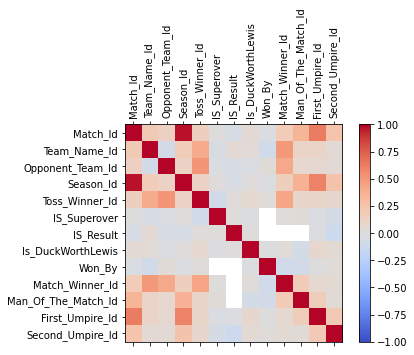

In [20]:
# Now we can make a pretty correlation heatmap with pyplot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_ball,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr_ball.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_ball.columns)
ax.set_yticklabels(corr_ball.columns)
plt.show()

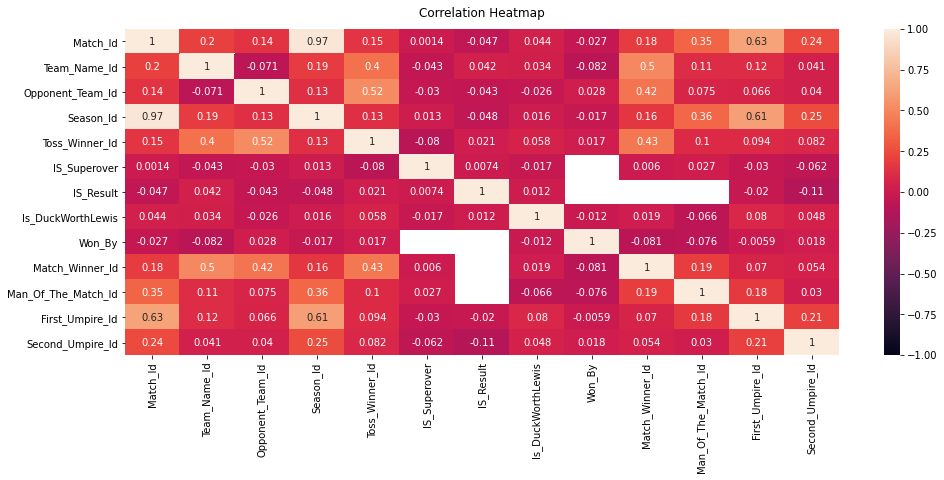

In [22]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_Match.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);